# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [16]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [18]:
# Your code here
# Your code here
import numpy as np
from keras.utils import to_categorical

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Verify the shape of the data
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 100)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # Import Dropout

# Your code here
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_17 (Dropout)        (None, 6, 6, 64)         

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [20]:
from keras import optimizers
from keras.optimizers import Adam # Import the Adam optimizer

# Your code here
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(x_test, y_test))





Epoch 1/50
1563/1563 [==============================] - 19s 12ms/step - loss: 4.1018 - accuracy: 0.0693 - val_loss: 3.6687 - val_accuracy: 0.1474
Epoch 2/50
1563/1563 [==============================] - 18s 12ms/step - loss: 3.5938 - accuracy: 0.1448 - val_loss: 3.3260 - val_accuracy: 0.2033
Epoch 3/50
1563/1563 [==============================] - 19s 12ms/step - loss: 3.3888 - accuracy: 0.1818 - val_loss: 3.1120 - val_accuracy: 0.2531
Epoch 4/50
1563/1563 [==============================] - 18s 11ms/step - loss: 3.2646 - accuracy: 0.2060 - val_loss: 3.0693 - val_accuracy: 0.2577
Epoch 5/50
1563/1563 [==============================] - 18s 12ms/step - loss: 3.1742 - accuracy: 0.2215 - val_loss: 2.9926 - val_accuracy: 0.2641
Epoch 6/50
1563/1563 [==============================] - 18s 11ms/step - loss: 3.1070 - accuracy: 0.2349 - val_loss: 2.8997 - val_accuracy: 0.2911
Epoch 7/50
1563/1563 [==============================] - 18s 11ms/step - loss: 3.0474 - accuracy: 0.2469 - val_loss: 2.8567 -

KeyboardInterrupt: 

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [ ]:
# Your code here
from keras import optimizers
from keras.optimizers import Adam # Import the Adam optimizer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, 
                    epochs=25,  # Choosing number of epochs - explained below
                    batch_size=32, 
                    validation_data=(x_test, y_test))      

Epoch 1/25
1563/1563 [==============================] - 40s 25ms/step - loss: 2.6117 - accuracy: 0.3350 - val_loss: 2.4430 - val_accuracy: 0.3809
Epoch 2/25
1563/1563 [==============================] - 41s 26ms/step - loss: 2.6064 - accuracy: 0.3353 - val_loss: 2.4182 - val_accuracy: 0.3890
Epoch 3/25
1563/1563 [==============================] - 41s 26ms/step - loss: 2.6027 - accuracy: 0.3366 - val_loss: 2.4462 - val_accuracy: 0.3813
Epoch 4/25
1563/1563 [==============================] - 41s 26ms/step - loss: 2.6037 - accuracy: 0.3366 - val_loss: 2.4221 - val_accuracy: 0.3914
Epoch 5/25
1563/1563 [==============================] - 131s 84ms/step - loss: 2.5943 - accuracy: 0.3374 - val_loss: 2.4782 - val_accuracy: 0.3745
Epoch 6/25
1563/1563 [==============================] - 41s 26ms/step - loss: 2.6055 - accuracy: 0.3359 - val_loss: 2.4548 - val_accuracy: 0.3796
Epoch 7/25
1563/1563 [==============================] - 41s 26ms/step - loss: 2.5898 - accuracy: 0.3433 - val_loss: 2.4168 

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [ ]:
from sklearn.metrics import classification_report

# Get predictions for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

#  y_test is in one-hot encoded format, convert it to class labels
y_true_classes = np.argmax(y_test, axis=1) 

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes)
print(report)

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.79      0.63      0.70       100
           1       0.43      0.55      0.48       100
           2       0.39      0.27      0.32       100
           3       0.25      0.13      0.17       100
           4       0.19      0.24      0.21       100
           5       0.25      0.26      0.25       100
           6       0.31      0.45      0.37       100
           7       0.57      0.35      0.43       100
           8       0.37      0.50      0.43       100
           9       0.75      0.43      0.55       100
          10       0.38      0.17      0.23       100
          11       0.38      0.15      0.22       100
          12       0.40      0.44      0.42       100
          13       0.44      0.26      0.33       100
          14       0.50      0.20      0.29       100
          15       0.55      0.23      0.32       100
          16       0.61   

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

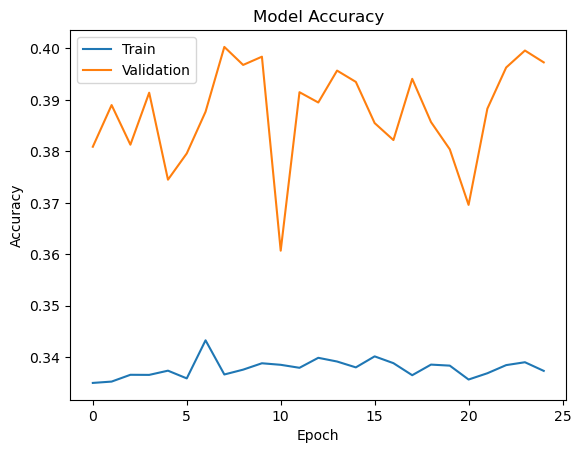

313/313 [==============================] - 2s 6ms/step


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Find correctly and incorrectly classified images
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1) 

correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

# Select one correct and one incorrect image
correct_index = correct_indices[0]
incorrect_index = incorrect_indices[0]

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

# Fit the data generator to the training data
datagen.fit(x_train)

# Build the model (same architecture as before)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=50,
                    validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/50
1563/1563 [==============================] - 49s 31ms/step - loss: 4.2545 - accuracy: 0.0433 - val_loss: 3.9122 - val_accuracy: 0.0965
Epoch 2/50
1563/1563 [==============================] - 49s 31ms/step - loss: 3.8995 - accuracy: 0.0944 - val_loss: 3.6594 - val_accuracy: 0.1523
Epoch 3/50
1563/1563 [==============================] - 36s 23ms/step - loss: 3.7437 - accuracy: 0.1198 - val_loss: 3.4428 - val_accuracy: 0.1866
Epoch 4/50
1563/1563 [==============================] - 33s 21ms/step - loss: 3.6456 - accuracy: 0.1382 - val_loss: 3.3406 - val_accuracy: 0.2053
Epoch 5/50
1563/1563 [==============================] - 33s 21ms/step - loss: 3.5725 - accuracy: 0.1497 - val_loss: 3.2591 - val_accuracy: 0.2133
Epoch 6/50
1563/1563 [==============================] - 33s 21ms/step - loss: 3.5255 - accuracy: 0.1578 - val_loss: 3.2054 - val_accuracy: 0.2288
Epoch 7/50
1563/1563 [==============================] - 25s 16ms/step - loss: 3.4859 - accuracy: 0.1652 - val_loss: 3.1868 -

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [24]:
# Your code here
from tensorflow.keras.optimizers import legacy

# Use the legacy Adam optimizer
legacy_adam = legacy.Adam(learning_rate=0.001)


In [25]:
from tensorflow.keras.layers import BatchNormalization

# Build the enhanced model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='softmax')
])


In [26]:
# Compile the model
model.compile(optimizer=legacy_adam, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

# Fit the data generator to the training data
datagen.fit(x_train)

# Train the model with data augmentation
history_augmented = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                              epochs=50,
                              validation_data=(x_test, y_test))


Epoch 1/50
1563/1563 [==============================] - 22s 14ms/step - loss: 4.4578 - accuracy: 0.0648 - val_loss: 3.7629 - val_accuracy: 0.1177
Epoch 2/50
1563/1563 [==============================] - 22s 14ms/step - loss: 3.8060 - accuracy: 0.1197 - val_loss: 3.3328 - val_accuracy: 0.1944
Epoch 3/50
1563/1563 [==============================] - 22s 14ms/step - loss: 3.5881 - accuracy: 0.1476 - val_loss: 3.2034 - val_accuracy: 0.2125
Epoch 4/50
1563/1563 [==============================] - 22s 14ms/step - loss: 3.4508 - accuracy: 0.1709 - val_loss: 3.1705 - val_accuracy: 0.2163
Epoch 5/50
1563/1563 [==============================] - 22s 14ms/step - loss: 3.3625 - accuracy: 0.1855 - val_loss: 3.0823 - val_accuracy: 0.2377
Epoch 6/50
1563/1563 [==============================] - 22s 14ms/step - loss: 3.2902 - accuracy: 0.2010 - val_loss: 2.8327 - val_accuracy: 0.2853
Epoch 7/50
1563/1563 [==============================] - 23s 14ms/step - loss: 3.2354 - accuracy: 0.2117 - val_loss: 2.7646 -

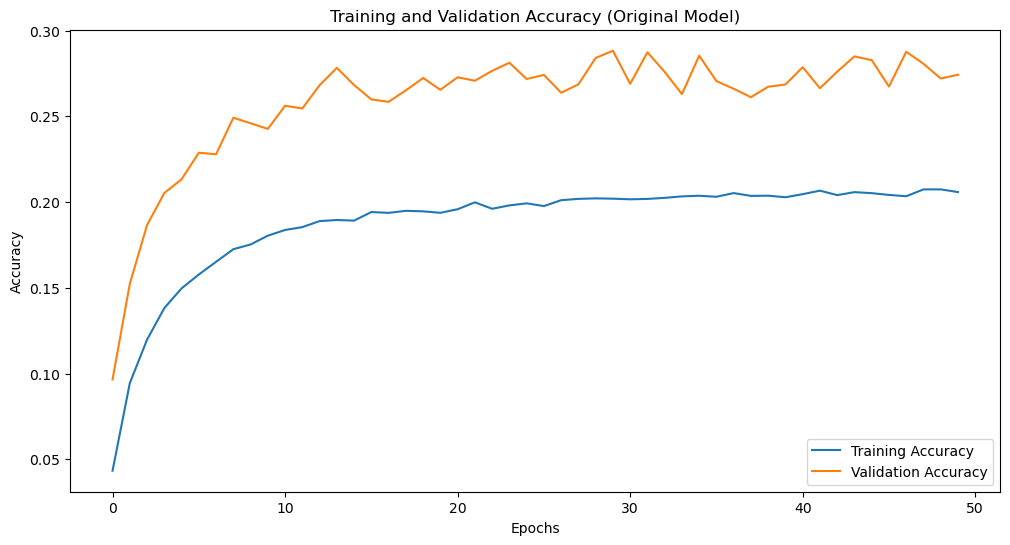

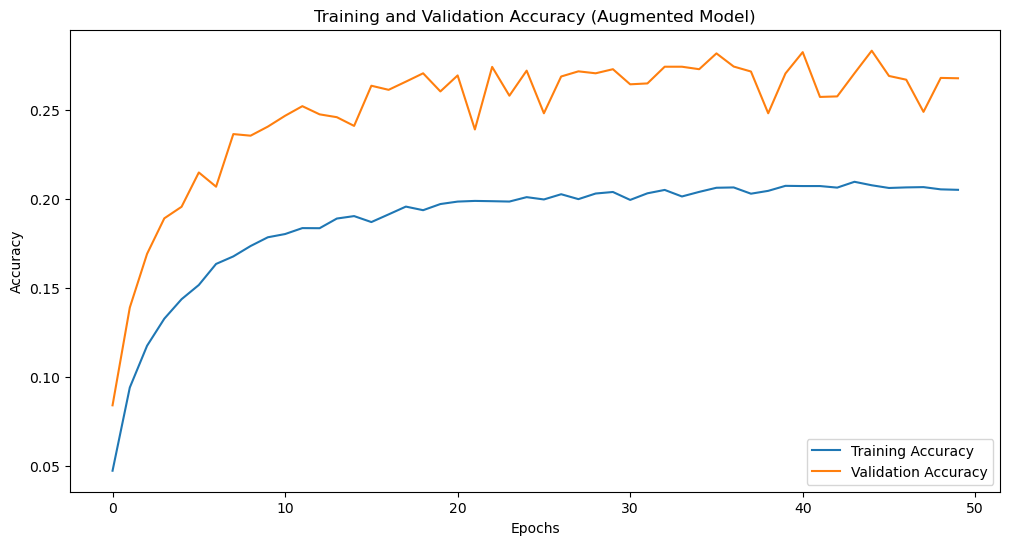

In [21]:
import matplotlib.pyplot as plt

def plot_accuracy(history, title='Model Accuracy'):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title(title)
    plt.show()

# Plot the accuracy for the original model
plot_accuracy(history, title='Training and Validation Accuracy (Original Model)')

# Plot the accuracy for the augmented model
plot_accuracy(history_augmented, title='Training and Validation Accuracy (Augmented Model)')
    

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.